# TMDB Movie Dataset Analysis

# Table of Contents
- [Introduction](#Introduction)
- [Data Wrangling](#data_wrangling)
- [Exploratory Data Analysis](#Exploratory_Data_Analysis)
- [Conclusion](#Conclusion)

# Introduction
  - This project was originally introduced on __[kaggle](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset)__
  - The dataset that will be analyzed in this report is the TMDB movie data containing information about 10,000 movies from The Movie Database (TMDB).
  - The main aim of project is to practice my pandas, Numpy, Matplotlib and seaborn data analysis techniques.
  -  The information includes some basic information about the movie like the title, cast, and director, and other relevant statistics such as popularity, budget, and revenue
## Questions
  - What kinds of properties are associated with movies that have high revenues?¶
  - Which genres are associated with high popularity?
  - Which director produces the highest revenue movies?
  - Which year produced movie with high revenue?

# Data Wrangling

First, the data is read from the csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df= pd.read_csv("tmdb_movies_data.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [2]:
df.shape

(10866, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Clean the duplicate row and NaN values

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Drop Columns

Drop the unnecessary columns which are not need for further analysis

In [6]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 
         'production_companies', 'vote_count', 'vote_average', 'budget_adj','revenue_adj'], axis=1, inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015


# Create a profit field for further analysis

In [7]:
df['profit']= df['revenue']-df['budget']
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,1363528810


# Clean the invalid data

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,release_year,profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859,2.520261e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260,9.659103e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,-4.139124e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000,9.092453e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,2.544506e+09


In [9]:
invalid_data=df.query('budget ==0').index
df.drop(invalid_data, axis=0, inplace=True)

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,release_year,profit
count,5169.000000,5169.000000,5.169000e+03,5.169000e+03,5169.000000,5169.000000,5.169000e+03
mean,45513.725479,0.992400,3.073958e+07,8.029101e+07,107.096150,2001.251112,4.955143e+07
std,72730.345078,1.329262,3.890441e+07,1.594865e+08,22.810038,11.776443,1.351328e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,1960.000000,-4.139124e+08
25%,8840.000000,0.347958,6.000000e+06,0.000000e+00,93.000000,1996.000000,-6.597680e+06
50%,13008.000000,0.624024,1.700000e+07,2.100156e+07,103.000000,2005.000000,2.507368e+06
75%,44943.000000,1.152417,4.000000e+07,8.945676e+07,117.000000,2010.000000,5.279686e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,2015.000000,2.544506e+09


# Exploratory Data Analysis

 ## What kinds of properties are associated with movies that have high revenues?

Text(0, 0.5, 'Number of TMDB Movie')

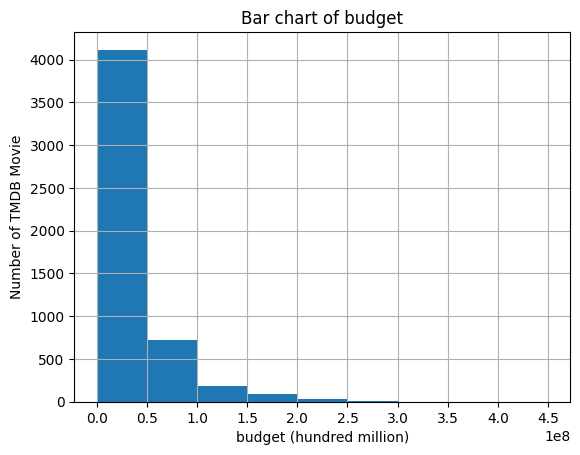

In [29]:
x_ticks = np.arange(0.000000e+00,5.000000e+08,5.000000e+07)
df['budget'].hist(bins=x_ticks)
plt.title("Bar chart of budget")
plt.xlabel("budget (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie")

Text(0, 0.5, 'Number of TMDB Movie')

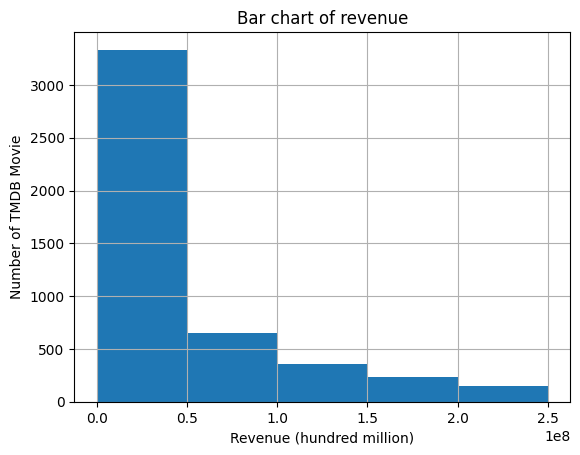

In [12]:
x_ticks = np.arange(0.000000e+00,3.000000e+08,5.000000e+07)
df['revenue'].hist(bins=x_ticks)
plt.title("Bar chart of revenue")
plt.xlabel("Revenue (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie")

Text(0, 0.5, 'Revenue(Billion)')

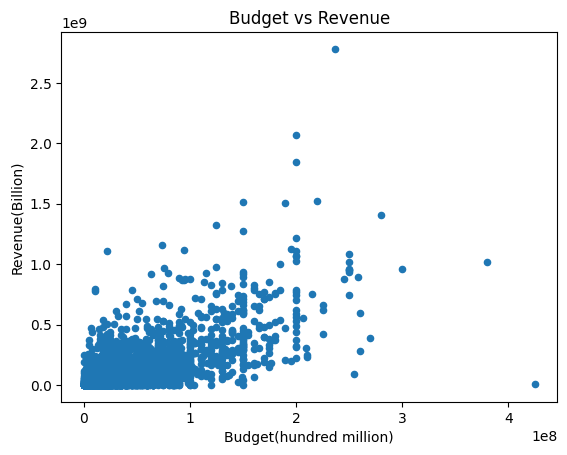

In [13]:
df.plot(x='budget', y='revenue', kind='scatter')
plt.title("Budget vs Revenue")
plt.xlabel("Budget(hundred million)")
plt.ylabel("Revenue(Billion)")

Text(0, 0.5, 'profit(Billion)')

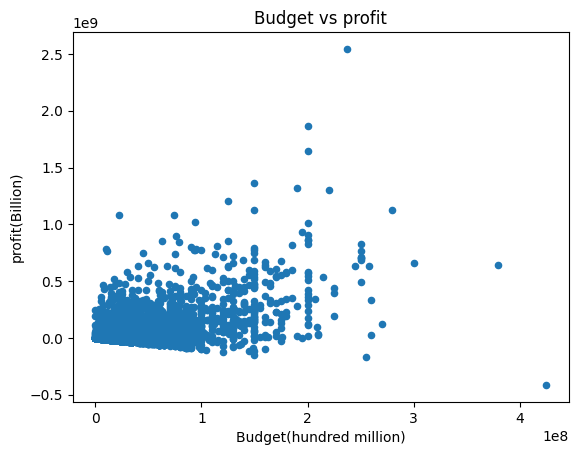

In [14]:
df.plot(x='budget', y='profit', kind='scatter')
plt.title("Budget vs profit")
plt.xlabel("Budget(hundred million)")
plt.ylabel("profit(Billion)")

## Create a decade field to analyze regarding decades

In [15]:
edge=[1960, 1970, 1980, 1990, 2000, 2010,2015]
name=["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
df["decade"]=pd.cut(df["release_year"], edge, labels=name)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,decade
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,1363528810,2010s
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015,228436354,2010s
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2015,185238201,2010s
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015,1868178225,2010s
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2015,1316249360,2010s


<Axes: xlabel='decade', ylabel='revenue'>

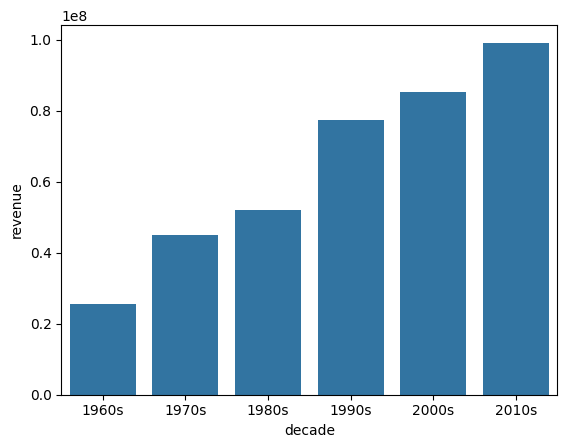

In [16]:
rev_dis = df.groupby(['decade'])['revenue'].mean().reset_index()
sns.barplot(x ="decade", y = "revenue", data = rev_dis)

## Which genres are associated with high popularity?

In [17]:
df['genres'] = df['genres'].str.split("|")
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,decade
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/2015,2015,1363528810,2010s


In [18]:
genre = df.explode('genres')
genre.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,decade
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/2015,2015,1363528810,2010s


<Axes: ylabel='genres'>

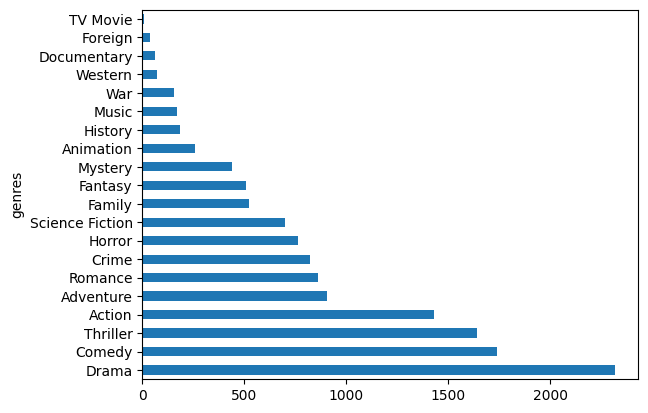

In [19]:
genre['genres'].value_counts().plot.barh()

Highest count of genres are Drama, Comedy and Thriller. Does it mean that they're most popular?

In [20]:
popular_genres=genre.groupby(['genres'])[['popularity']].mean().sort_values(by='popularity', ascending=False).iloc[:5]
popular_genres

,popularity
genres,
Adventure,1.621153
Science Fiction,1.501626
Fantasy,1.469079
Animation,1.455120
Action,1.298258


Popularity wise Adventure, Science Fiction and Fantasy are most popular but popular genre changed over the year.

In [21]:
blockbuster_movies = df.groupby(['original_title'])[['budget', 'profit']].sum().sort_values(by='budget',ascending= False)
blockbuster_movies.head(11)

,budget,profit
original_title,,
The Warrior's Way,425000000,-413912431
Pirates of the Caribbean: On Stranger Tides,380000000,641683000
Pirates of the Caribbean: At World's End,300000000,661000000
Godzilla,290000000,618090363
Avengers: Age of Ultron,280000000,1125035767
The Avengers,280000000,1288080742
Superman Returns,270000000,121081192
John Carter,260000000,24139100
Tangled,260000000,331794936


The Warrior's Way and The Lone Ranger are the high budget movie with no profit, so billion dollar budget also making losses.  

## Which director produces the highest revenue movies?

In [22]:
df['director'].value_counts()

director
Steven Spielberg                  29
Woody Allen                       25
Clint Eastwood                    24
Ridley Scott                      22
Martin Scorsese                   21
                                  ..
Nick Love                          1
Adrian Grunberg                    1
James Watkins                      1
Stephen St. Leger|James Mather     1
Harold P. Warren                   1
Name: count, Length: 2390, dtype: int64

In [23]:
df['director'].str.contains('|')

0        True
1        True
2        True
3        True
4        True
         ... 
10835    True
10841    True
10848    True
10855    True
10865    True
Name: director, Length: 5169, dtype: object

In [24]:
df['director']=df['director'].str.split('|')
df['director'].str.contains('|').sum()

0.0

In [25]:
directors=df.explode('director')
directors['director'].value_counts()

director
Steven Spielberg    30
Woody Allen         26
Clint Eastwood      24
Ridley Scott        22
Martin Scorsese     22
                    ..
Angel Gracia         1
Chris Berkeley       1
VÃ­ctor GarcÃ­a      1
Colin Minihan        1
Harold P. Warren     1
Name: count, Length: 2510, dtype: int64

In [26]:
top_directors= directors.groupby(['director'])[['revenue', 'profit']].mean().sort_values(by='revenue', ascending=False)
top_directors.head()

,revenue,profit
director,,
Jennifer Lee,1.274219e+09,1.124219e+09
David Yates,1.038574e+09,8.448239e+08
Pierre Coffin,8.903356e+08,8.173356e+08
Mike Thurmeier,8.772448e+08,7.822448e+08
Raman Hui,7.989582e+08,6.389582e+08


## Which year produced movie with high revenue?

#### Avatar(2009), Star Wars: The Force Awakens(2015), Titanic(1997) are the Top 3 highest grossing revenue. 

In [27]:
df.sort_values(by='revenue', ascending=False).head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,decade
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,[James Cameron],162,"[Action, Adventure, Fantasy, Science Fiction]",12/10/2009,2009,2544505847,2000s
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,[J.J. Abrams],136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/2015,2015,1868178225,2010s
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,[James Cameron],194,"[Drama, Romance, Thriller]",11/18/1997,1997,1645034188,1990s


# Conclusion

From the above analysis we found answers for the question which mentioned in introduction.
-  The revenue changed drastically over the year. 1960's to 2010s we can visibly see a changes of revenue over the decades.
-  Highest count of genres are Drama, Comedy and Thriller, count of the genres does't mean high popular.
-  Popularity wise Adventure, Science Fiction and Fantasy are most popular.
- Jennifer Lee is the director who produced the highest revenue and high profit movie.
- Avatar produced in 2009 has the highest grossing revenue at USD 2.7 billion.

      The limitation of this research is that there are so many data that have been cleaned in this report. This data contains NaN, duplicates, or 0 in some or all columns. After Data Wrangling the data count changed from 10866 to 5169.